In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Churn.csv",na_values='Nan')
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [4]:
data.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [7]:
data.rename(columns={'area.code':'area_code','account.length':'account_length','voice.plan':'voice_plan',
                     'voice.messages':'voice_messages','intl.plan':'intl_plan','intl.mins':'intl_mins',
                    'intl.calls':'intl_calls','intl.charge':'intl_charge','day.mins':'day_mins','day.calls':'day_calls',
                    'day.charge':'day_charge','eve.mins':'eve_mins','eve.calls':'eve_calls','eve.charge':'eve_charge',
                    'night.mins':'night_mins','night.calls':'night_calls','night.charge':'night_charge','customer.calls':'customer_calls'
                    },inplace=True)
data

,Unnamed: 0,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,...,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [9]:
le = preprocessing.LabelEncoder()
objlist = ['area_code','intl_plan','voice_plan','churn','state']
data[objlist] = data[objlist].apply(le.fit_transform)

In [10]:
data

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,16,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,35,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,31,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,35,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,36,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,0,50,1,40,0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,0
4996,49,1,152,0,0,0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,1
4997,7,1,61,0,0,0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,0
4998,7,2,109,0,0,0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,0


In [11]:
data.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'churn'],
      dtype='object')

In [12]:
data = data[[ 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge',
       'day_calls', 'day_charge', 'eve_calls', 'eve_charge', 
       'night_calls', 'night_charge', 'customer_calls', 'churn']]
data

,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,churn
0,128,1,25,0,10.0,3,2.70,110,45.07,99,16.78,91,11.01,1,0
1,107,1,26,0,13.7,3,3.70,123,27.47,103,16.62,103,11.45,1,0
2,137,0,0,0,12.2,5,3.29,114,41.38,110,10.30,104,7.32,0,0
3,84,0,0,1,6.6,7,1.78,71,50.90,88,5.26,89,8.86,2,0
4,75,0,0,1,10.1,3,2.73,113,28.34,122,12.61,121,8.41,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,9.9,5,2.67,127,40.07,126,18.96,116,13.39,2,0
4996,152,0,0,0,14.7,2,3.97,90,31.31,73,21.83,113,9.61,3,1
4997,61,0,0,0,13.6,4,3.67,89,23.90,128,14.69,97,9.56,1,0
4998,109,0,0,0,8.5,6,2.30,67,32.10,92,14.59,89,10.10,0,0


In [13]:
data['Total_Charge'] =  data['day_charge'] + data['eve_charge'] + data['night_charge']

In [14]:
data

,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,churn,Total_Charge
0,128,1,25,0,10.0,3,2.70,110,45.07,99,16.78,91,11.01,1,0,72.86
1,107,1,26,0,13.7,3,3.70,123,27.47,103,16.62,103,11.45,1,0,55.54
2,137,0,0,0,12.2,5,3.29,114,41.38,110,10.30,104,7.32,0,0,59.00
3,84,0,0,1,6.6,7,1.78,71,50.90,88,5.26,89,8.86,2,0,65.02
4,75,0,0,1,10.1,3,2.73,113,28.34,122,12.61,121,8.41,3,0,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,9.9,5,2.67,127,40.07,126,18.96,116,13.39,2,0,72.42
4996,152,0,0,0,14.7,2,3.97,90,31.31,73,21.83,113,9.61,3,1,62.75
4997,61,0,0,0,13.6,4,3.67,89,23.90,128,14.69,97,9.56,1,0,48.15
4998,109,0,0,0,8.5,6,2.30,67,32.10,92,14.59,89,10.10,0,0,56.79


In [15]:
data.drop(['day_charge','eve_charge','night_charge'],axis=1,inplace=True)

In [16]:
data=data.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10,12]]

In [17]:
data

,churn,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_calls,eve_calls,night_calls,customer_calls,Total_Charge
0,0,128,1,25,0,10.0,3,2.70,110,99,91,1,72.86
1,0,107,1,26,0,13.7,3,3.70,123,103,103,1,55.54
2,0,137,0,0,0,12.2,5,3.29,114,110,104,0,59.00
3,0,84,0,0,1,6.6,7,1.78,71,88,89,2,65.02
4,0,75,0,0,1,10.1,3,2.73,113,122,121,3,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,50,1,40,0,9.9,5,2.67,127,126,116,2,72.42
4996,1,152,0,0,0,14.7,2,3.97,90,73,113,3,62.75
4997,0,61,0,0,0,13.6,4,3.67,89,128,97,1,48.15
4998,0,109,0,0,0,8.5,6,2.30,67,92,89,0,56.79


In [18]:
x = data.iloc[:,1:]
x

,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_calls,eve_calls,night_calls,customer_calls,Total_Charge
0,128,1,25,0,10.0,3,2.70,110,99,91,1,72.86
1,107,1,26,0,13.7,3,3.70,123,103,103,1,55.54
2,137,0,0,0,12.2,5,3.29,114,110,104,0,59.00
3,84,0,0,1,6.6,7,1.78,71,88,89,2,65.02
4,75,0,0,1,10.1,3,2.73,113,122,121,3,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,40,0,9.9,5,2.67,127,126,116,2,72.42
4996,152,0,0,0,14.7,2,3.97,90,73,113,3,62.75
4997,61,0,0,0,13.6,4,3.67,89,128,97,1,48.15
4998,109,0,0,0,8.5,6,2.30,67,92,89,0,56.79


In [19]:
y = data.iloc[:,0:1]
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,0
4998,0


In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
transformer = RobustScaler().fit(x)
x=transformer.transform(x)

In [22]:
x

array([[ 0.51851852,  1.        ,  1.47058824, ..., -0.34615385,
         0.        ,  1.16008615],
       [ 0.12962963,  1.        ,  1.52941176, ...,  0.11538462,
         0.        , -0.08327351],
       [ 0.68518519,  0.        ,  0.        , ...,  0.15384615,
        -1.        ,  0.16511127],
       ...,
       [-0.72222222,  0.        ,  0.        , ..., -0.11538462,
         0.        , -0.6137832 ],
       [ 0.16666667,  0.        ,  0.        , ..., -0.42307692,
        -1.        ,  0.00646088],
       [-0.25925926,  1.        ,  2.        , ...,  0.        ,
        -1.        , -0.36109117]])

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=15)

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [26]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1254   39]
 [ 156   42]]


In [28]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
LR=fscore
LR

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1293
           1       0.52      0.21      0.30       198

    accuracy                           0.87      1491
   macro avg       0.70      0.59      0.61      1491
weighted avg       0.84      0.87      0.84      1491



0.6144666022221427

In [29]:
#KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv = 10)
    k_scores.append(scores.mean())
    print("K value=",k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))

K value= 1
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1293
           1       0.51      0.46      0.49       198

    accuracy                           0.87      1491
   macro avg       0.72      0.70      0.71      1491
weighted avg       0.86      0.87      0.87      1491

K value= 3
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1293
           1       0.78      0.43      0.55       198

    accuracy                           0.91      1491
   macro avg       0.85      0.71      0.75      1491
weighted avg       0.90      0.91      0.90      1491

K value= 5
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1293
           1       0.84      0.35      0.49       198

    accuracy                           0.90      1491
   macro avg       0.87      0.67      0.72      1491
weighted avg       0.90      0.90      0.

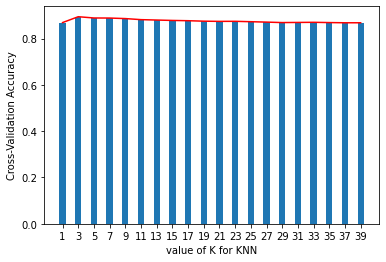

In [30]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color = "red")
    
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.show()

In [31]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [55]:
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
KNN=fscore
KNN

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1290
           1       0.96      0.88      0.91       201

    accuracy                           0.98      1491
   macro avg       0.97      0.93      0.95      1491
weighted avg       0.98      0.98      0.98      1491



0.9507893723527147

In [56]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='gini',min_samples_split=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
metrics.accuracy_score(pred,y_test)
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
DT=fscore
DT

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1290
           1       0.84      0.88      0.86       201

    accuracy                           0.96      1491
   macro avg       0.91      0.92      0.92      1491
weighted avg       0.96      0.96      0.96      1491



0.9167497097042533

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
metrics.accuracy_score(pred,y_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1293
           1       0.82      0.80      0.81       198

    accuracy                           0.95      1491
   macro avg       0.90      0.89      0.89      1491
weighted avg       0.95      0.95      0.95      1491



In [57]:
# Random Forest Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 140
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
RD=fscore
RD

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1074
           1       0.98      0.85      0.91       169

    accuracy                           0.98      1243
   macro avg       0.98      0.92      0.95      1243
weighted avg       0.98      0.98      0.98      1243



0.9492445896284197

In [36]:
#SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# clf = SVC()
# param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
# gsv = GridSearchCV(clf,param_grid,cv=10)
# gsv.fit(x_train,y_train)


In [37]:
#gsv.best_params_ , gsv.best_score_ 

In [58]:
clf = SVC(C= 1, gamma = 0.5,kernel="rbf")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
SVM=fscore
SVM

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1074
           1       0.88      0.46      0.60       169

    accuracy                           0.92      1243
   macro avg       0.90      0.73      0.78      1243
weighted avg       0.92      0.92      0.91      1243



0.779435096655672

In [61]:
#ANN
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=12,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                195       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile model
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history = model.fit(x,y,validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
40/40 [==============================] - 1s 6ms/step - loss: 0.7652 - accuracy: 0.2704 - val_loss: 0.6588 - val_accuracy: 0.8612
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.8581 - val_loss: 0.5344 - val_accuracy: 0.8581
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.8581 - val_loss: 0.4707 - val_accuracy: 0.8581
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8581 - val_loss: 0.4372 - val_accuracy: 0.8581
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8581 - val_loss: 0.4189 - val_accuracy: 0.8581
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8581 - val_loss: 0.4079 - val_accuracy: 0.8581
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8581 - val_loss: 0.4012 - val_accuracy: 0.8581
Epoch 8/50
40/40 [==

In [65]:
model.save_weights("mywt.kmw")

In [66]:
#evaluate the model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
ANN=model.metrics_names[1], scores[1]*100
ANN=ANN[1]
ANN

156/156 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8833
accuracy: 88.33%


88.32762837409973

In [45]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred =  nb.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, y_pred)
conf_matrix1

array([[981,  93],
       [ 90,  79]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

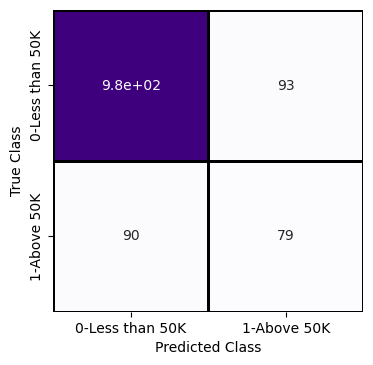

In [48]:
import seaborn as sns
%matplotlib inline
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

In [67]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_test, y_pred,target_names=names))
precision,recall,fscore,support = score(y_test,y_pred,average='macro')
NB=fscore
NB

                 precision    recall  f1-score   support

0-Less than 50K       0.92      0.99      0.95      1074
    1-Above 50K       0.88      0.46      0.60       169

       accuracy                           0.92      1243
      macro avg       0.90      0.73      0.78      1243
   weighted avg       0.92      0.92      0.91      1243



0.779435096655672

In [68]:
#Bagging

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

num_trees = 100
model = BaggingClassifier(max_samples=0.8, n_estimators=num_trees,random_state=8)

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(classification_report(y_test,pred))
precision,recall,fscore,support = score(y_test,pred,average='macro')
BG=fscore
BG

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1290
           1       0.96      0.87      0.91       201

    accuracy                           0.98      1491
   macro avg       0.97      0.93      0.95      1491
weighted avg       0.98      0.98      0.98      1491



0.9491856716705158

In [51]:
param_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100, max_features = 0.5),
                   param_grid,)
clf.fit(x_train, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [52]:
clf.best_params_ , clf.best_score_

({'base_estimator__max_depth': 5, 'max_samples': 0.5}, 0.9151790291904407)

In [54]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=96,base_estimator=RandomForestClassifier(random_state=101),
                        n_estimators=100,learning_rate=0.01)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1290
           1       0.96      0.88      0.91       201

    accuracy                           0.98      1491
   macro avg       0.97      0.93      0.95      1491
weighted avg       0.98      0.98      0.98      1491

